In [1]:
import numpy as np
import matplotlib.pyplot as plt
import perturbations
import estimators
from statistical_problems import GaussianLocation, UniformLocation, LinearRegression
from simulation import Simulation

%load_ext autoreload
%autoreload 2

# Todos:
# Perturbation type specification (CDS/IDS/JDS) and allows for different minimax bounds
# Uniform
# Location
# LR


In [22]:

# Define problem parameters
gaussian_params = {
    'n': 10,
    'p': 3,
    'theta': np.array([0.0, 0.0, 0.0]),
    'sigma': np.diag([1/6, 2/6, 3/6]),
    
    'perturbation_class' : 'JDS'
}

uniform_params = {
    'n':50,
    'p':1,
    'theta' : np.array([3]),
    
    'perturbation_class' : 'JDS'
}

linear_regression_params = {
    'n':50,
    'p':10,
    'theta' : np.ones(10),
    'perturbation_class' : 'JDS'
}


def get_statistical_problem(problem_type, loss_type = "squared_error", sigma = None):
    new_params = {"loss": loss_type}
    if sigma is not None:
        new_params["sigma"] = sigma
    if problem_type == "Gaussian":
        # Create a GaussianMean problem instance
        problem = GaussianLocation(**(gaussian_params | new_params))
    elif problem_type == "Uniform":
        # Create a UniformMean problem instance
        problem = UniformLocation(**(uniform_params | new_params))
    elif problem_type == "Linear Regression":
        # Create a Linear Regression problem instance
        X = np.random.normal(size = (linear_regression_params['n'],linear_regression_params['p']))
        # u,s,vH = np.linalg.svd(X,full_matrices=True)
        # s[0:-1] = 100
        # s[-1] = 0.001
        # s_full = np.zeros((u.shape[0],vH.shape[0]))
        # np.fill_diagonal(s_full,s)
        # X = u @ s_full @ vH
        linear_regression_params['X'] = X
        problem = LinearRegression(**(linear_regression_params | new_params))
    else:
        raise NotImplementedError
    return problem

# Define epsilon values 
alpha_values = np.linspace(-2.5, 0, 40)

100%|██████████| 40/40 [00:00<00:00, 82.04it/s]


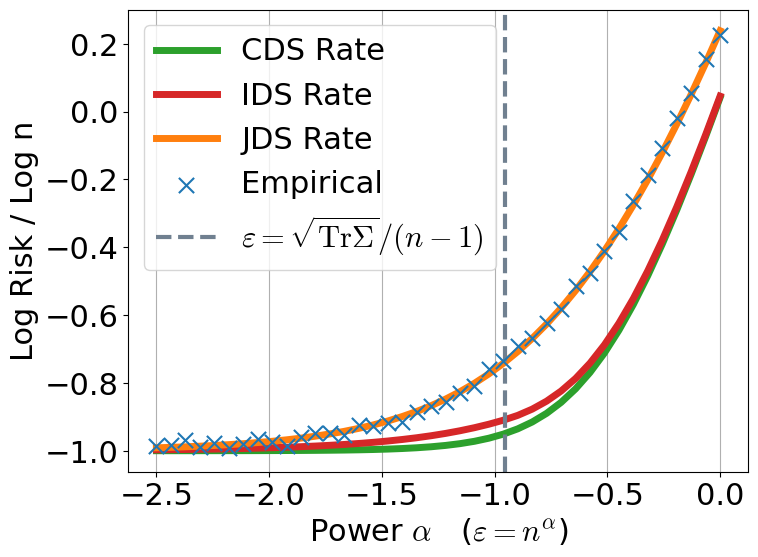

In [35]:
# Simulation Details
problem_type = "Gaussian"
num_copies = 2000
display_est = "all"

problem = get_statistical_problem(problem_type)
epsilon_values = np.power(problem.n, alpha_values)

# Create and run the simulation
simulation = Simulation(problem, epsilon_values, num_copies, display_est)
results = simulation.run_simulation()

# Generate the plot


# # Display the results (optional)
# for estimator, estimator_results in results.items():
#     print(f"Results for {estimator.__class__.__name__}:")
#     for epsilon, risk in estimator_results.items():
#         print(f"  Epsilon = {
plt.rcParams['figure.figsize'] = [8, 6]

simulation.display_est = "best"
simulation.generate_plot(results)


Running Gaussian with squared_error loss and sigma num 0


100%|██████████| 40/40 [00:01<00:00, 35.19it/s]


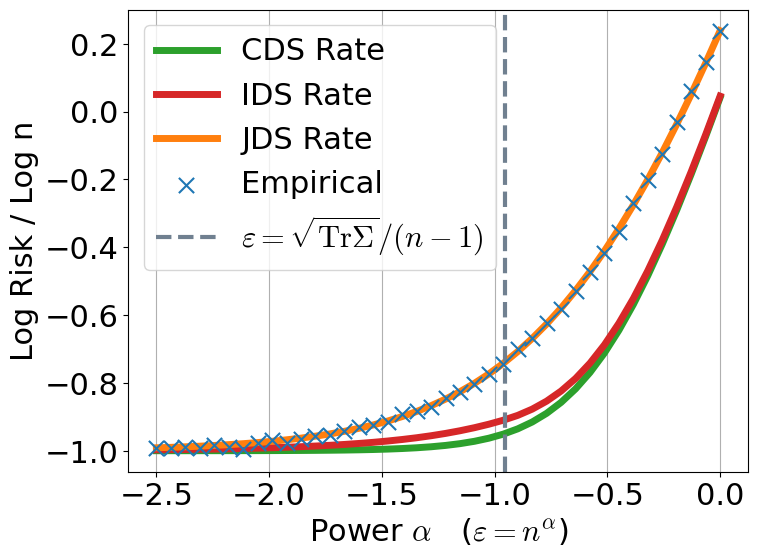

Running Uniform with squared_error loss and sigma num 0


 60%|██████    | 24/40 [00:04<00:03,  4.90it/s]

In [40]:
num_copies = 5000
# Simulation Details
for problem_type in ["Gaussian","Uniform","Linear Regression"]:
    all_sigma = [None]
    losses = ["squared_error"]
    if problem_type == "Linear Regression":
        all_sigma = [np.eye(50), np.diag([(i+1)/10 for i in range(50)])]
        losses.append("prediction_error")
    for loss in losses:
        for i, sigma in enumerate(all_sigma):
            print(f"Running {problem_type} with {loss} loss and sigma num {i}")
            problem = get_statistical_problem(problem_type, sigma=sigma, loss_type=loss)
            epsilon_values = np.power(problem.n, alpha_values)

            # Create and run the simulation
            
            simulation = Simulation(problem, epsilon_values, num_copies, display_est)
            results = simulation.run_simulation()

            # Generate the plot


            # # Display the results (optional)
            # for estimator, estimator_results in results.items():
            #     print(f"Results for {estimator.__class__.__name__}:")
            #     for epsilon, risk in estimator_results.items():
            #         print(f"  Epsilon = {
            plt.rcParams['figure.figsize'] = [8, 6]

            simulation.display_est = "best"
            simulation.generate_plot(results)


In [94]:
np.linspace(1,50,num=50)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.])

In [126]:
u,s,vH = np.linalg.svd(X)
v = vH.T
theta = np.ones(10)
Y = X@theta + np.random.normal(size=(50))

In [133]:

Y_pert = Y + X@v[:,-1]/(np.linalg.norm(X@v[:,-1]))

In [134]:
htheta = np.linalg.inv(X.T@X) @ (X.T)@Y
htheta2 = np.linalg.inv(X.T@X) @ (X.T)@Y_pert


In [135]:
htheta

array([-1.58969887,  5.14697974,  0.87042631,  4.7104133 , -1.42441963,
        3.0674499 , -1.06850343,  2.24156114, -0.14930309, -3.53842104])

In [136]:
htheta2

array([-4.64033754,  9.8777045 ,  0.96891933,  9.15134511, -4.32421743,
        5.21979324, -3.15545961,  3.87500696, -1.27842273, -8.75784812])

In [139]:
np.linalg.norm(htheta-htheta2)

10.000000000103597

In [138]:
v[:,-1]

array([-0.30506387,  0.47307248,  0.0098493 ,  0.44409318, -0.28997978,
        0.21523433, -0.20869562,  0.16334458, -0.11291196, -0.52194271])